# Jumia Phone Price Prediction and Product Placement Analysis Project


## Business Understanding

### Problem Description

#### Retailers on Jumia's e-commerce platform face challenges in determining optimal pricing due to the competitive nature of the marketplace having more than 100,000 retailers and the time-consuming process of evaluating other competitor prices with more than 20,000 products listed specifically the mobile phones.Understanding pricing dynamics and the impact of discounts is critical for e-commerce retailers, particularly in competitive markets. This project aims to provide actionable insights that can help retailers optimize pricing strategies and improve customer satisfaction. By analyzing discount effectiveness, businesses can create promotions that resonate with consumers, thereby increasing sales and fostering customer loyalty.This project seeks to analyze Jumia's phone catalog data to develop a predictive model that provides data-driven insights, enabling sellers to set competitive prices and maximize profitability effectively.


### Objectives

#### -What factors would lead to my product being listed on the first page to ensure visibility/marketability? .
#### -To see if there is any relationship between the phone features and the number of reviews it gets.
#### -To develop a machine learning model to predict the optimal price for the product to assure its placement on the first page and competitiveness.
#### -To test whether there is a relationship between the buyer ratings and the pricing.




## Data Understanding
#### The dataset in use consists of smartphone-related data collected from the Jumia e-commerce platform, focusing on the following features:
#### Name: The name of the smartphone and its features such as ROM, RAM, Battery capacity.
#### Price: The current selling price of the smartphone.
#### Old Price: The previous selling price (before any discounts).
#### Discount: The percentage or amount of discount applied.
#### Rating: Customer ratings (e.g., average star rating).
#### Reviews: The number of reviews from buying customers regarding the product.



## Loading the necessary libraries

In [1111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import re
from sklearn.linear_model import LinearRegression ,Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split



#### Loading the dataset

In [1065]:
import pandas as pd
import numpy as np
# Import Regular Expression
import re
# Loading the data
df = pd.read_csv("Data\jumia_phones.csv")
# Display the first few rows of the data to get a sense of the data structure
df.head()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
0,"XIAOMI Redmi A3, 6.71"", 3GB RAM + 64GB (Dual S...","KSh 11,000",NaN,NaN,4.1 out of 5,4.1 out of 5(220),"Page 1, Rank 1"
1,"Tecno Spark 20, Android 13, 6.6"", 128GB + 4GB ...","KSh 12,925","KSh 15,000",14%,4.4 out of 5,4.4 out of 5(135),"Page 1, Rank 2"
2,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.2 out of 5,4.2 out of 5(151),"Page 1, Rank 3"
3,"Samsung Galaxy A05, 6.7'' 4GB RAM + 128GB ROM ...","KSh 14,000",NaN,NaN,4.5 out of 5,4.5 out of 5(29),"Page 1, Rank 4"
4,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.3 out of 5,4.3 out of 5(249),"Page 1, Rank 5"


In [1066]:
print("df shape:",df.shape)
print ("------------------------------------------------")
print("df missing values",df.isna().sum())
print ("------------------------------------------------")
print("df missing values",df.isna().sum())

df shape: (12000, 7)
------------------------------------------------
df missing values Name                    0
Price                   0
Old Price            3899
Discount             3899
Rating                300
Number of Reviews     300
Search Ranking          0
dtype: int64
------------------------------------------------
df missing values Name                    0
Price                   0
Old Price            3899
Discount             3899
Rating                300
Number of Reviews     300
Search Ranking          0
dtype: int64


In [1067]:
#check for duplicates in df
print(df.duplicated().sum())

0


## FEATURE EXTRACTION

### We have a number of features in the "Name" column such as phone capacity, phone memory , warranty . These features could be playing a key role in determining phone popularity. We will employ Rwgular expressions to ectract the features the name column and create additional columns.

In [1068]:
#duplicate the name column

df['Name_duplicate'] = df['Name']
df.head()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking,Name_duplicate
0,"XIAOMI Redmi A3, 6.71"", 3GB RAM + 64GB (Dual S...","KSh 11,000",NaN,NaN,4.1 out of 5,4.1 out of 5(220),"Page 1, Rank 1","XIAOMI Redmi A3, 6.71"", 3GB RAM + 64GB (Dual S..."
1,"Tecno Spark 20, Android 13, 6.6"", 128GB + 4GB ...","KSh 12,925","KSh 15,000",14%,4.4 out of 5,4.4 out of 5(135),"Page 1, Rank 2","Tecno Spark 20, Android 13, 6.6"", 128GB + 4GB ..."
2,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.2 out of 5,4.2 out of 5(151),"Page 1, Rank 3","Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (..."
3,"Samsung Galaxy A05, 6.7'' 4GB RAM + 128GB ROM ...","KSh 14,000",NaN,NaN,4.5 out of 5,4.5 out of 5(29),"Page 1, Rank 4","Samsung Galaxy A05, 6.7'' 4GB RAM + 128GB ROM ..."
4,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.3 out of 5,4.3 out of 5(249),"Page 1, Rank 5","Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (..."


#### Step1; Connverting the data gfram into json format
#### why? ; This will enable us to employ loops across all entrries in the cleaning process

In [1069]:
import json

# Convert DataFrame to JSON string in list format
json_string = df.to_json(orient="records")

# Parse the JSON string to a list of dictionaries
json_list = json.loads(json_string)

# Display the first 5 records as a list
print(json_list[:5])



[{'Name': 'XIAOMI Redmi A3, 6.71", 3GB RAM + 64GB (Dual SIM), 5000mAh, Midnight Black  (2 YRs WRTY)', 'Price': 'KSh 11,000', 'Old Price': None, 'Discount': None, 'Rating': '4.1 out of 5', 'Number of Reviews': '4.1 out of 5(220)', 'Search Ranking': 'Page 1, Rank 1', 'Name_duplicate': 'XIAOMI Redmi A3, 6.71", 3GB RAM + 64GB (Dual SIM), 5000mAh, Midnight Black  (2 YRs WRTY)'}, {'Name': 'Tecno Spark 20, Android 13, 6.6", 128GB + 4GB RAM(4GB Extended), 50MP, 5000mAh, Gravity Black(1YR WRTY)', 'Price': 'KSh 12,925', 'Old Price': 'KSh 15,000', 'Discount': '14%', 'Rating': '4.4 out of 5', 'Number of Reviews': '4.4 out of 5(135)', 'Search Ranking': 'Page 1, Rank 2', 'Name_duplicate': 'Tecno Spark 20, Android 13, 6.6", 128GB + 4GB RAM(4GB Extended), 50MP, 5000mAh, Gravity Black(1YR WRTY)'}, {'Name': 'Itel S23 6.6", 128GB + 4GB RAM, 50MP Camera, (Dual SIM), 4G, 5000mAh - Mystery White (1YR WRTY)', 'Price': 'KSh 10,000', 'Old Price': None, 'Discount': None, 'Rating': '4.2 out of 5', 'Number of Rev

In [1070]:
# Get the name entries in the name column and assign them to a list called data
#select the two name columns
data = json_list

# convert the data type of data to a list

# Check the data type of data
type(data)
data[:5]

[{'Name': 'XIAOMI Redmi A3, 6.71", 3GB RAM + 64GB (Dual SIM), 5000mAh, Midnight Black  (2 YRs WRTY)',
  'Price': 'KSh 11,000',
  'Old Price': None,
  'Discount': None,
  'Rating': '4.1 out of 5',
  'Number of Reviews': '4.1 out of 5(220)',
  'Search Ranking': 'Page 1, Rank 1',
  'Name_duplicate': 'XIAOMI Redmi A3, 6.71", 3GB RAM + 64GB (Dual SIM), 5000mAh, Midnight Black  (2 YRs WRTY)'},
 {'Name': 'Tecno Spark 20, Android 13, 6.6", 128GB + 4GB RAM(4GB Extended), 50MP, 5000mAh, Gravity Black(1YR WRTY)',
  'Price': 'KSh 12,925',
  'Old Price': 'KSh 15,000',
  'Discount': '14%',
  'Rating': '4.4 out of 5',
  'Number of Reviews': '4.4 out of 5(135)',
  'Search Ranking': 'Page 1, Rank 2',
  'Name_duplicate': 'Tecno Spark 20, Android 13, 6.6", 128GB + 4GB RAM(4GB Extended), 50MP, 5000mAh, Gravity Black(1YR WRTY)'},
 {'Name': 'Itel S23 6.6", 128GB + 4GB RAM, 50MP Camera, (Dual SIM), 4G, 5000mAh - Mystery White (1YR WRTY)',
  'Price': 'KSh 10,000',
  'Old Price': None,
  'Discount': None,
  'R

#### Step 2; Define a cleaning fuction and Try cleaning the first entry just to see if the code works

In [1071]:
#clean the first entry in the list
# Define function to clean 'name_duplicate'
def clean_name_duplicate(name_duplicate):
    # Remove unwanted characters, keeping numbers and spaces
    cleaned = re.sub(r"[,'+\-]", " ", name_duplicate)  # Replace commas, single quotes, and plus signs with space
    cleaned = re.sub(r"\s+", " ", cleaned).strip()  # Replace multiple spaces with a single space
    return cleaned
# Apply the cleaning function to 'name_duplicate' for each dictionary in the list
for entry in data:
    entry['Name_duplicate'] = clean_name_duplicate(entry['Name_duplicate'])

# Output the cleaned data

data[0:5]

    

[{'Name': 'XIAOMI Redmi A3, 6.71", 3GB RAM + 64GB (Dual SIM), 5000mAh, Midnight Black  (2 YRs WRTY)',
  'Price': 'KSh 11,000',
  'Old Price': None,
  'Discount': None,
  'Rating': '4.1 out of 5',
  'Number of Reviews': '4.1 out of 5(220)',
  'Search Ranking': 'Page 1, Rank 1',
  'Name_duplicate': 'XIAOMI Redmi A3 6.71" 3GB RAM 64GB (Dual SIM) 5000mAh Midnight Black (2 YRs WRTY)'},
 {'Name': 'Tecno Spark 20, Android 13, 6.6", 128GB + 4GB RAM(4GB Extended), 50MP, 5000mAh, Gravity Black(1YR WRTY)',
  'Price': 'KSh 12,925',
  'Old Price': 'KSh 15,000',
  'Discount': '14%',
  'Rating': '4.4 out of 5',
  'Number of Reviews': '4.4 out of 5(135)',
  'Search Ranking': 'Page 1, Rank 2',
  'Name_duplicate': 'Tecno Spark 20 Android 13 6.6" 128GB 4GB RAM(4GB Extended) 50MP 5000mAh Gravity Black(1YR WRTY)'},
 {'Name': 'Itel S23 6.6", 128GB + 4GB RAM, 50MP Camera, (Dual SIM), 4G, 5000mAh - Mystery White (1YR WRTY)',
  'Price': 'KSh 10,000',
  'Old Price': None,
  'Discount': None,
  'Rating': '4.2 ou

#### Step 3; Separate the sumsung brand and other brands becuase the name entries are done differently

In [1072]:
#separate sumsung entries from other entries in the name list by checking "name_duplicate"
samsung_phones=[]
other_phones=[]

for entry in data:
    if "Samsung" in entry['Name_duplicate']:
        samsung_phones.append(entry)
    else:
        other_phones.append(entry)

samsung_phones, other_phones   

# # Get the length of the cleaned data
print(len(samsung_phones), len(other_phones))  # 3 and 3 respectivelysamsung_phones_data_length = len(samsung_phones)



2700 9300


#### Step 4; Feature extraction from the samsung phones list

In [1073]:

# Feature extraction from the samsung phones using regular expressions
def extract_samsung_info(spec):
    # Regular expressions for extracting relevant parts
    name_pattern = r'^(Samsung\s+Galaxy\s+\w+\s*\w*)'
    display_pattern = r'(\d+(\.\d+)?)\s*["\']'
    ram_pattern = r'(\d+)GB RAM'
    storage_pattern = r'(\d+GB)\s*ROM'
    camera_pattern = r'(\d+MP)'
    battery_pattern = r'(\d{4}mAh)'
    sim_pattern = r'\(?(Dual\s+Sim|DUAL\s+SIM|Single\s+Sim|Single)\)?'
    
    # Extract all the numbers that are followed by GB
    gb_values = [int(m.group(1)) for m in re.finditer(r'(\d+)GB', spec)]

    # Determine RAM and Storage based on size
    ram = min(gb_values) if gb_values else None
    storage = max(gb_values) if gb_values else None

    # Updated color pattern to ensure it captures correctly
    color_pattern = r'(?i)[-\s](Black|White|Blue|Red|Green|Yellow|Gold|Silver|Gray|Pink)(?=\s|\(|$)'
    color_match = re.search(color_pattern, spec)
    color = color_match.group(1).strip() if color_match else None

    # Set a default display size if not found
    display_size = re.search(display_pattern, spec).group(1) if re.search(display_pattern, spec) else "6.0"

    # Use case-insensitive search for name
    name_match = re.search(name_pattern, spec, re.IGNORECASE)
    
    return {
        "Phone_Name": name_match.group(0).strip() if name_match else None,
        "Display Size": display_size,
        "RAM": ram,
        "Storage": storage,
        "Camera": re.search(camera_pattern, spec).group(1) if re.search(camera_pattern, spec) else None,
        "Battery": re.search(battery_pattern, spec).group(1) if re.search(battery_pattern, spec) else None,
        "Color": color,
        "Warranty": "Yes" if "WRTY" in spec else "No",
        "Number of SIMs": 2 if re.search(sim_pattern, spec) and "Dual" in re.search(sim_pattern, spec).group(0) else 1
    }

# Sample data for samsung_phones
# samsung_phones = [
#     {'name': 'Samsung Galaxy A14, 6.6", 4GB RAM + 64GB (Dual SIM), 5000mAh, Black (1 YR WRTY)',
#      'name_duplicate': 'Samsung Galaxy A14, 6.6", 4GB RAM + 64GB (Dual SIM), 5000mAh, Black (1 YR WRTY)'},
#     {'name': 'Samsung Galaxy S22, 6.1", 8GB RAM - 128GB (Single SIM), 3700mAh, Phantom Black',
#      'name_duplicate': 'Samsung Galaxy S22, 6.1", 8GB RAM - 128GB (Single SIM), 3700mAh, Phantom Black'}
# ]

# Extract information for Samsung phones and expand the dictionaries
for entry in samsung_phones:
    # Extract info using name_duplicate
    extracted_info = extract_samsung_info(entry["Name_duplicate"])
    # Update the existing entry with the extracted information
    entry.update(extracted_info)

# Create a DataFrame
samsung_phones_df = pd.DataFrame(samsung_phones)

# Display the DataFrame
print("Samsung Phones:")
print(samsung_phones_df.head())
print(samsung_phones_df.shape)
print(type(samsung_phones_df))

Samsung Phones:
                                                Name       Price   Old Price  \
0  Samsung Galaxy A05, 6.7'' 4GB RAM + 128GB ROM ...  KSh 14,000        None   
1  Samsung GALAXY A15, 6.5'' HD+, 4GB RAM + 128GB...  KSh 17,445  KSh 29,999   
2  Samsung Galaxy A05, 6.7'' 4GB RAM + 128GB ROM ...  KSh 13,899  KSh 22,999   
3  Samsung Galaxy A15, 6.5'' Display, 4GB RAM + 1...  KSh 17,445  KSh 29,999   
4  Samsung Galaxy A05s, 6.7", 64GB + 4GB (Dual SI...  KSh 13,599  KSh 13,999   

  Discount        Rating  Number of Reviews   Search Ranking  \
0     None  4.5 out of 5   4.5 out of 5(29)   Page 1, Rank 4   
1      42%  4.2 out of 5  4.2 out of 5(420)   Page 1, Rank 6   
2      40%  3.9 out of 5  3.9 out of 5(116)   Page 1, Rank 7   
3      42%  4.3 out of 5  4.3 out of 5(233)  Page 1, Rank 13   
4       3%  4.6 out of 5   4.6 out of 5(26)  Page 1, Rank 14   

                                      Name_duplicate             Phone_Name  \
0  Samsung Galaxy A05 6.7 4GB RAM 128GB

In [1074]:
import re

# Further cleaning to remove mathematical operators within the other phones list
def clean_entries(entries):
    cleaned_entries = []
    for entry in entries:
        # Make a copy of the entry to avoid modifying the original
        cleaned_entry = entry.copy()
        
        # Remove mathematical operators from 'name_duplicate'
        cleaned_entry['name_duplicate'] = re.sub(r'[+\-]', '', entry["Name_duplicate"])
        
        # Append the entire cleaned dictionary to the list
        cleaned_entries.append(cleaned_entry)
    
    return cleaned_entries

# Clean the samsung_phones list
other_phones = clean_entries(other_phones)

# Display the cleaned Samsung phone specifications
other_phones


[{'Name': 'XIAOMI Redmi A3, 6.71", 3GB RAM + 64GB (Dual SIM), 5000mAh, Midnight Black  (2 YRs WRTY)',
  'Price': 'KSh 11,000',
  'Old Price': None,
  'Discount': None,
  'Rating': '4.1 out of 5',
  'Number of Reviews': '4.1 out of 5(220)',
  'Search Ranking': 'Page 1, Rank 1',
  'Name_duplicate': 'XIAOMI Redmi A3 6.71" 3GB RAM 64GB (Dual SIM) 5000mAh Midnight Black (2 YRs WRTY)',
  'name_duplicate': 'XIAOMI Redmi A3 6.71" 3GB RAM 64GB (Dual SIM) 5000mAh Midnight Black (2 YRs WRTY)'},
 {'Name': 'Tecno Spark 20, Android 13, 6.6", 128GB + 4GB RAM(4GB Extended), 50MP, 5000mAh, Gravity Black(1YR WRTY)',
  'Price': 'KSh 12,925',
  'Old Price': 'KSh 15,000',
  'Discount': '14%',
  'Rating': '4.4 out of 5',
  'Number of Reviews': '4.4 out of 5(135)',
  'Search Ranking': 'Page 1, Rank 2',
  'Name_duplicate': 'Tecno Spark 20 Android 13 6.6" 128GB 4GB RAM(4GB Extended) 50MP 5000mAh Gravity Black(1YR WRTY)',
  'name_duplicate': 'Tecno Spark 20 Android 13 6.6" 128GB 4GB RAM(4GB Extended) 50MP 5000m

#### Step 4; Feature extraction from the other phones list

In [1075]:
# Feature extraction from the other_ phones using regular expressions
def extract_other_phones_info(spec):
    # Regular expressions for extracting relevant parts
    name_pattern = r'^(Samsung\s+Galaxy\s+\w+\s*\w*)'
    display_pattern = r'(\d+(\.\d+)?)\s*["\']'
    ram_pattern = r'(\d+)GB RAM'
    storage_pattern = r'(\d+GB)\s*ROM'
    camera_pattern = r'(\d+MP)'
    battery_pattern = r'(\d{4}mAh)'
    sim_pattern = r'\(?(Dual\s+Sim|DUAL\s+SIM|Single\s+Sim|Single)\)?'
    
    # Extract all the numbers that are followed by GB
    gb_values = [int(m.group(1)) for m in re.finditer(r'(\d+)GB', spec)]

    # Determine RAM and Storage based on size
    ram = min(gb_values) if gb_values else None
    storage = max(gb_values) if gb_values else None

    # Updated color pattern to ensure it captures correctly
    color_pattern = r'(?i)[-\s](Black|White|Blue|Red|Green|Yellow|Gold|Silver|Gray|Pink)(?=\s|\(|$)'
    color_match = re.search(color_pattern, spec)
    color = color_match.group(1).strip() if color_match else None

    # Set a default display size if not found
    display_size = re.search(display_pattern, spec).group(1) if re.search(display_pattern, spec) else "6.0"

    # Use case-insensitive search for name
    name_match = re.search(name_pattern, spec, re.IGNORECASE)
    
    return {
        "Phone_Name": name_match.group(0).strip() if name_match else None,
        "Display Size": display_size,
        "RAM": ram,
        "Storage": storage,
        "Camera": re.search(camera_pattern, spec).group(1) if re.search(camera_pattern, spec) else None,
        "Battery": re.search(battery_pattern, spec).group(1) if re.search(battery_pattern, spec) else None,
        "Color": color,
        "Warranty": "Yes" if "WRTY" in spec else "No",
        "Number of SIMs": 2 if re.search(sim_pattern, spec) and "Dual" in re.search(sim_pattern, spec).group(0) else 1
    }


# Extract information for Samsung phones and expand the dictionaries
for entry in other_phones:
    # Extract info using name_duplicate
    extracted_info = extract_other_phones_info(entry["Name_duplicate"])
    # Update the existing entry with the extracted information
    entry.update(extracted_info)

# Create a DataFrame
other_phones_df = pd.DataFrame(other_phones)

# Display the DataFrame
print("Other_Phones:")
print(other_phones_df.head())
print(other_phones_df.shape)
print(type(other_phones_df)) # Check the data type of other_phones_df.columns)

Other_Phones:
                                                Name       Price   Old Price  \
0  XIAOMI Redmi A3, 6.71", 3GB RAM + 64GB (Dual S...  KSh 11,000        None   
1  Tecno Spark 20, Android 13, 6.6", 128GB + 4GB ...  KSh 12,925  KSh 15,000   
2  Itel S23 6.6", 128GB + 4GB RAM, 50MP Camera, (...  KSh 10,000        None   
3  Itel S23 6.6", 128GB + 4GB RAM, 50MP Camera, (...  KSh 10,000        None   
4  XIAOMI Redmi 13C, 6.74"  8GB RAM + 256GB ROM, ...  KSh 16,899  KSh 29,999   

  Discount        Rating  Number of Reviews  Search Ranking  \
0     None  4.1 out of 5  4.1 out of 5(220)  Page 1, Rank 1   
1      14%  4.4 out of 5  4.4 out of 5(135)  Page 1, Rank 2   
2     None  4.2 out of 5  4.2 out of 5(151)  Page 1, Rank 3   
3     None  4.3 out of 5  4.3 out of 5(249)  Page 1, Rank 5   
4      44%    4 out of 5    4 out of 5(151)  Page 1, Rank 8   

                                      Name_duplicate  \
0  XIAOMI Redmi A3 6.71" 3GB RAM 64GB (Dual SIM) ...   
1  Tecno Spark

In [1076]:
#check for duplicates in samsumg_phones_df and other_phones_df based on phone name
print(samsung_phones_df.duplicated(subset="Name").sum())
print(other_phones_df.duplicated(subset="Name").sum())

2691
9269


In [1077]:
print(samsung_phones_df.duplicated().sum())
print(other_phones_df.duplicated().sum())

0
0


In [1078]:
print(samsung_phones_df.columns)
print(other_phones_df.columns)


Index(['Name', 'Price', 'Old Price', 'Discount', 'Rating', 'Number of Reviews',
       'Search Ranking', 'Name_duplicate', 'Phone_Name', 'Display Size', 'RAM',
       'Storage', 'Camera', 'Battery', 'Color', 'Warranty', 'Number of SIMs'],
      dtype='object')
Index(['Name', 'Price', 'Old Price', 'Discount', 'Rating', 'Number of Reviews',
       'Search Ranking', 'Name_duplicate', 'name_duplicate', 'Phone_Name',
       'Display Size', 'RAM', 'Storage', 'Camera', 'Battery', 'Color',
       'Warranty', 'Number of SIMs'],
      dtype='object')


#### Step 5; Merge the data frames into one

In [1079]:
#merge the samsung df and other_phones_df
smartphones_df = pd.concat([samsung_phones_df, other_phones_df]).sort_values("Name")

# Display the merged DataFrame
smartphones_df.head()
print(smartphones_df.shape)
print(smartphones_df.columns)

(12000, 18)
Index(['Name', 'Price', 'Old Price', 'Discount', 'Rating', 'Number of Reviews',
       'Search Ranking', 'Name_duplicate', 'Phone_Name', 'Display Size', 'RAM',
       'Storage', 'Camera', 'Battery', 'Color', 'Warranty', 'Number of SIMs',
       'name_duplicate'],
      dtype='object')


In [1080]:
print("Duplicates in smartphones_df:")
print(smartphones_df.duplicated().sum())

print("Duplicates in df:")
print(df.duplicated().sum())


Duplicates in smartphones_df:
0
Duplicates in df:
0


In [1081]:
#extract Number of reviews from the number of reviews column
smartphones_df["Total_Reviews"] =smartphones_df["Number of Reviews"].str.extract(r'\((.*?)\)', expand=False)
#extract  rank from the searching rank column
smartphones_df["Rank"] = smartphones_df["Search Ranking"].str.extract(r"Rank (\d+)", expand=False)
#extract the page number from the searching rank column
smartphones_df["Page_Number"] = smartphones_df["Search Ranking"].str.extract(r"Page\s(\d+)", expand=False)
# Extracting the rating numerator
smartphones_df["Rating_Numerator"] =smartphones_df["Rating"].str.extract(r'(\d+(\.\d+)?)\s*out\s+of', expand=False)[0]
# Extracting the rating denominator (the number after 'out of')
smartphones_df["Rating_Denominator"] = smartphones_df["Rating"].str.extract(r'out\s+of\s+(\d+)', expand=False)
smartphones_df.head()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking,Name_duplicate,Phone_Name,Display Size,...,Battery,Color,Warranty,Number of SIMs,name_duplicate,Total_Reviews,Rank,Page_Number,Rating_Numerator,Rating_Denominator
8823,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299","KSh 20,000",34%,4.1 out of 5,4.1 out of 5(211),"Page 285, Rank 28",Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,None,6.0,...,None,None,No,1,Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,211,28,285,4.1,5
8172,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299","KSh 20,000",34%,4.1 out of 5,4.1 out of 5(211),"Page 264, Rank 28",Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,None,6.0,...,None,None,No,1,Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,211,28,264,4.1,5
5816,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299","KSh 20,000",34%,4.1 out of 5,4.1 out of 5(211),"Page 188, Rank 28",Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,None,6.0,...,None,None,No,1,Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,211,28,188,4.1,5
5165,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299","KSh 20,000",34%,4.1 out of 5,4.1 out of 5(211),"Page 167, Rank 28",Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,None,6.0,...,None,None,No,1,Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,211,28,167,4.1,5
267,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299","KSh 20,000",34%,4.1 out of 5,4.1 out of 5(211),"Page 9, Rank 28",Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,None,6.0,...,None,None,No,1,Infinix HOT 40i 5000mah (4GB RAM 128GB ROM) 50...,211,28,9,4.1,5


In [1082]:
#checking duplicates
smartphones_df.duplicated().sum()

0

## DATA CLEANING

#### We dop the columns that we have  utilized to extract various features from. 

In [1083]:
#drop the redudant columns
smartphones_df.drop(['Number of Reviews','Old Price', 'Search Ranking', 'Rating','Name_duplicate','name_duplicate','Rating_Denominator'], axis=1, inplace=True)
smartphones_df.head()

,Name,Price,Discount,Phone_Name,Display Size,RAM,Storage,Camera,Battery,Color,Warranty,Number of SIMs,Total_Reviews,Rank,Page_Number,Rating_Numerator
8823,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,None,6.0,4,128,50MP,None,None,No,1,211,28,285,4.1
8172,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,None,6.0,4,128,50MP,None,None,No,1,211,28,264,4.1
5816,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,None,6.0,4,128,50MP,None,None,No,1,211,28,188,4.1
5165,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,None,6.0,4,128,50MP,None,None,No,1,211,28,167,4.1
267,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,None,6.0,4,128,50MP,None,None,No,1,211,28,9,4.1


In [1084]:
#checking duplicates
smartphones_df.duplicated().sum()

0

In [1085]:
#shape of complete_df
smartphones_df.shape

(12000, 16)

In [1086]:
#check the missing values in the complete_df
smartphones_df.isnull().sum()

Name                   0
Price                  0
Discount            3899
Phone_Name          9300
Display Size           0
RAM                    0
Storage                0
Camera              3300
Battery             2700
Color               2400
Warranty               0
Number of SIMs         0
Total_Reviews        300
Rank                   0
Page_Number            0
Rating_Numerator     300
dtype: int64

In [1087]:
# add a column capuring phone brand
smartphones_df['Brand'] = smartphones_df['Name'].str.split().str.get(0)

#### Filling in the missing values


In [1088]:
## fill the  missing value in the discount column with 0
smartphones_df['Discount'] = smartphones_df['Discount'].fillna(0)

# fill in the phone name with the first 10 characters of the name column
smartphones_df['Phone_Name'] = smartphones_df['Phone_Name'].fillna(smartphones_df['Name'].str[:13])

 #fill in the missing values in the camera column with the mode of the camera column
smartphones_df['Camera'] = smartphones_df['Camera'].fillna(smartphones_df['Camera'].mode()[0])

# fill in the missing values in the battery column with the mode of the battery column
smartphones_df['Battery'] = smartphones_df['Battery'].fillna(smartphones_df['Battery'].mode()[0])

# fill in the missing values in the color column with 'unknown"
smartphones_df['Color'] = smartphones_df['Color'].fillna('unknown')

# fill in the missing values in the Reviews column with 0
smartphones_df['Total_Reviews'] = smartphones_df['Total_Reviews'].fillna(0)

# fill in the missing values in the Rating column with 0
smartphones_df['Rating_Numerator'] = smartphones_df['Rating_Numerator'].fillna(0)

# fill in the missing values in the  "old price" column with  'price' with 0



In [ ]:
smartphones_df.isnull().sum()

Name                0
Price               0
Old Price           0
Discount            0
Phone_Name          0
Display Size        0
RAM                 0
Storage             0
Camera              0
Battery             0
Color               0
Warranty            0
Number of SIMs      0
Total_Reviews       0
Rank                0
Page_Number         0
Rating_Numerator    0
Brand               0
dtype: int64

In [1089]:
smartphones_df.head()

,Name,Price,Discount,Phone_Name,Display Size,RAM,Storage,Camera,Battery,Color,Warranty,Number of SIMs,Total_Reviews,Rank,Page_Number,Rating_Numerator,Brand
8823,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,Infinix HOT 4,6.0,4,128,50MP,5000mAh,unknown,No,1,211,28,285,4.1,Infinix
8172,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,Infinix HOT 4,6.0,4,128,50MP,5000mAh,unknown,No,1,211,28,264,4.1,Infinix
5816,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,Infinix HOT 4,6.0,4,128,50MP,5000mAh,unknown,No,1,211,28,188,4.1,Infinix
5165,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,Infinix HOT 4,6.0,4,128,50MP,5000mAh,unknown,No,1,211,28,167,4.1,Infinix
267,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...","KSh 13,299",34%,Infinix HOT 4,6.0,4,128,50MP,5000mAh,unknown,No,1,211,28,9,4.1,Infinix


In [1090]:
#convert the price column to integer
smartphones_df['Price'] = smartphones_df['Price'].str.replace('KSh', '').str.replace(',', '').astype(int)
#convert battaery columns to integer
smartphones_df['Battery'] = smartphones_df['Battery'].str.replace('mAh', '').str.replace(',', '').astype(int)
#convert the camera column to integer
smartphones_df['Camera'] = smartphones_df['Camera'].str.replace('MP', '').str.replace(',', '').astype(int)
#conert the camera columns into boolean below 50mp and above 50mp
smartphones_df['Camera'] = smartphones_df['Camera'].apply(lambda x: True if x >= 50 else False)
# conert number of sims to dual or not; boolean  
smartphones_df['Number of SIMs'] = smartphones_df['Number of SIMs'].apply(lambda x: False if x == '1' else True)
#Remove the % sign from discount column
smartphones_df['Discount'] = smartphones_df['Discount'].str.replace('%', '').astype(float)
print(smartphones_df.dtypes)
#check missing values
smartphones_df.isnull().sum()


Name                 object
Price                 int32
Discount            float64
Phone_Name           object
Display Size         object
RAM                   int64
Storage               int64
Camera                 bool
Battery               int32
Color                object
Warranty             object
Number of SIMs         bool
Total_Reviews        object
Rank                 object
Page_Number          object
Rating_Numerator     object
Brand                object
dtype: object


Name                   0
Price                  0
Discount            3899
Phone_Name             0
Display Size           0
RAM                    0
Storage                0
Camera                 0
Battery                0
Color                  0
Warranty               0
Number of SIMs         0
Total_Reviews          0
Rank                   0
Page_Number            0
Rating_Numerator       0
Brand                  0
dtype: int64

In [1091]:
#fill in the missing value in disciount column with 0
smartphones_df['Discount'] = smartphones_df['Discount'].fillna(0)
#check missing values
smartphones_df.isnull().sum()

Name                0
Price               0
Discount            0
Phone_Name          0
Display Size        0
RAM                 0
Storage             0
Camera              0
Battery             0
Color               0
Warranty            0
Number of SIMs      0
Total_Reviews       0
Rank                0
Page_Number         0
Rating_Numerator    0
Brand               0
dtype: int64

In [1103]:
#convert discount, battery,rank,page_number, rating numerator and camera columns to float
smartphones_df['Battery'] = smartphones_df['Battery'].astype(float)
smartphones_df['Rank'] = smartphones_df['Rank'].astype(float)
smartphones_df['Page_Number'] = smartphones_df['Page_Number'].astype(float)
smartphones_df['Rating_Numerator'] = smartphones_df['Rating_Numerator'].astype(float)
smartphones_df['Number of SIMs'] = smartphones_df['Number of SIMs'].astype(float)
smartphones_df['Total_Reviews'] = smartphones_df['Total_Reviews'].astype('int32')

In [1104]:
# Rename the camera column
smartphones_df.rename(columns={'Camera': 'Camera >=50mp'}, inplace=True)
smartphones_df.head()


,Name,Price,Discount,Phone_Name,Display Size,RAM,Storage,Camera >=50mp,Battery,Color,Warranty,Number of SIMs,Total_Reviews,Rank,Page_Number,Rating_Numerator,Brand
8823,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...",13299,34.0,Infinix HOT 4,6.0,4,128,True,5000.0,unknown,No,1.0,211,28.0,285.0,4.1,Infinix
8172,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...",13299,34.0,Infinix HOT 4,6.0,4,128,True,5000.0,unknown,No,1.0,211,28.0,264.0,4.1,Infinix
5816,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...",13299,34.0,Infinix HOT 4,6.0,4,128,True,5000.0,unknown,No,1.0,211,28.0,188.0,4.1,Infinix
5165,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...",13299,34.0,Infinix HOT 4,6.0,4,128,True,5000.0,unknown,No,1.0,211,28.0,167.0,4.1,Infinix
267,"Infinix HOT 40i,5000mah,(4GB RAM+128GB ROM) 50...",13299,34.0,Infinix HOT 4,6.0,4,128,True,5000.0,unknown,No,1.0,211,28.0,9.0,4.1,Infinix


In [ ]:
#check for missing value in number of sims
smartphones_df['Number of SIMs'].isnull().sum()

0

## EXPLORATORY DATA ANALYSIS

#### Lets check the top 10 brands for the phones in our catalogue

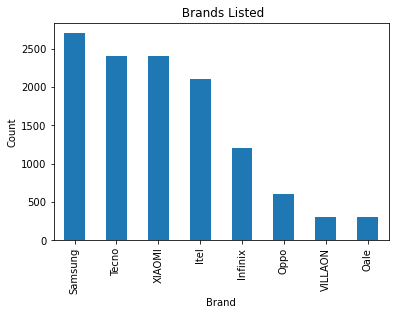

<Figure size 2880x1080 with 0 Axes>

In [1105]:
#Checking the most listed brand

Brand_names = smartphones_df['Brand'].value_counts().index.tolist()

# filter the dataframe to only include the top 50 phone names
Brand_names = smartphones_df[smartphones_df['Brand'].isin(Brand_names)]

# create a bar graph of the top 50 phone names
Brand_names['Brand'].value_counts().plot(kind='bar')

# Add titles and labels
plt.title(' Brands Listed')
plt.xlabel('Brand')
plt.ylabel('Count')
#adjust size of the plot
plt.figure(figsize=(40, 15))

# Show the plot 
plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Infinix'),
  Text(1, 0, 'XIAOMI'),
  Text(2, 0, 'Samsung'),
  Text(3, 0, 'Itel'),
  Text(4, 0, 'VILLAON'),
  Text(5, 0, 'Oale'),
  Text(6, 0, 'Oppo'),
  Text(7, 0, 'Tecno')])

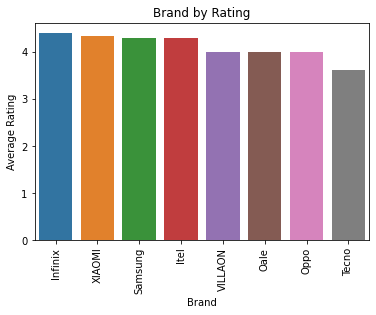

In [1106]:
## check barnd by rating
brand_rating = smartphones_df.groupby('Brand')['Rating_Numerator'].mean().sort_values(ascending=False).reset_index()
# plot the bar graph
sns.barplot(x='Brand', y='Rating_Numerator', data=brand_rating)
plt.title('Brand by Rating')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Samsung'),
  Text(1, 0, 'Itel'),
  Text(2, 0, 'XIAOMI'),
  Text(3, 0, 'Tecno'),
  Text(4, 0, 'Infinix'),
  Text(5, 0, 'Oppo'),
  Text(6, 0, 'Oale'),
  Text(7, 0, 'VILLAON')])

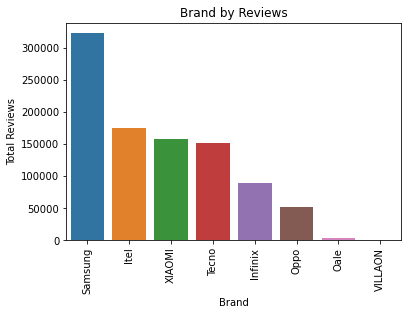

In [1107]:
# Check brands with most reviews

brand_reviews = smartphones_df.groupby('Brand')['Total_Reviews'].sum().sort_values(ascending=False).reset_index()
# plot the bar graph
sns.barplot(x='Brand', y='Total_Reviews', data=brand_reviews)
plt.title('Brand by Reviews')
plt.xlabel('Brand')
plt.ylabel('Total Reviews')

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Oale'),
  Text(1, 0, 'VILLAON'),
  Text(2, 0, 'Oppo'),
  Text(3, 0, 'Infinix'),
  Text(4, 0, 'Itel'),
  Text(5, 0, 'XIAOMI'),
  Text(6, 0, 'Tecno'),
  Text(7, 0, 'Samsung')])

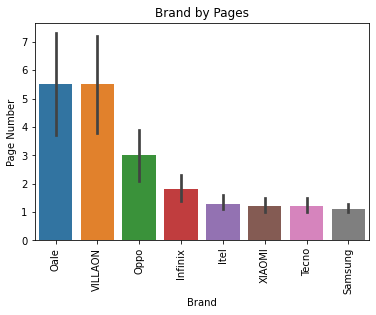

In [1109]:
#check the brands on top 10 pages
brand_pages = smartphones_df.groupby('Brand')['Page_Number'].nsmallest(10).sort_values(ascending=False).reset_index()

# plot the bar graph

sns.barplot(x='Brand', y='Page_Number', data=brand_pages)
plt.title('Brand by Pages')
plt.xlabel('Brand')
plt.ylabel('Page Number')
plt.xticks(rotation=90)

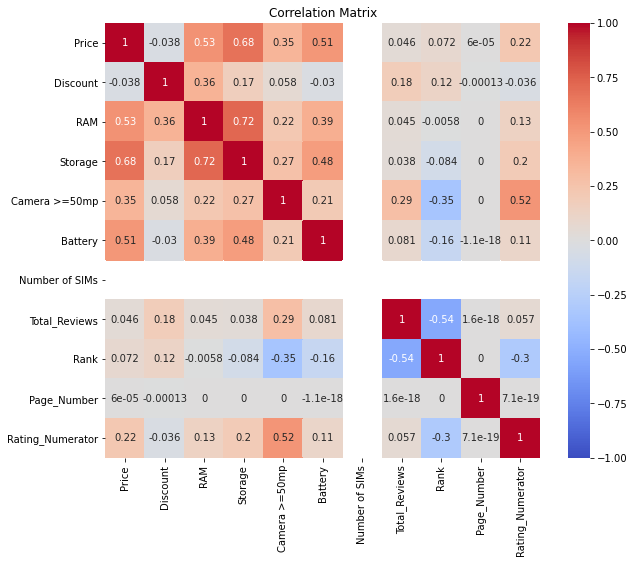

Price               1.000000
Storage             0.676142
RAM                 0.533064
Battery             0.509556
Camera >=50mp       0.349904
Rating_Numerator    0.219908
Rank                0.071768
Total_Reviews       0.045858
Page_Number         0.000060
Discount           -0.037581
Number of SIMs           NaN
Name: Price, dtype: float64

In [1108]:
### correlation annalysis
correlation_matrix = smartphones_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Correlation Matrix")
plt.show()
smartphones_df.corr()['Price'].sort_values(ascending=False)

#### Description of the correlation matrix heat map
The features most strongly correlated with price are Storage, RAM, and Battery, indicating that these hardware specifications are likely the biggest drivers of price increases. The weaker or near-zero correlations, like those with Page_Number and Discount, indicate they don’t impact the price as significantly

## MODELLING

In [ ]:
#test train spli the data

from sklearn.model_selection import train_test_split